In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-stock-data-updated-till-28jun2021/TSLA.csv


## About Dataset

### What is TESLA?
Tesla, Inc. is an American electric vehicle and clean energy company based in Palo Alto, California. Tesla's current products include electric cars, battery energy storage from home to grid-scale, solar panels and solar roof tiles, as well as other related products and services.

### Information about this dataset
This dataset provides historical data of TESLA INC. stock (TSLA). The data is available at a daily level. Currency is USD.

## Veri Kümesi Hakkında

### TESLA nedir?
Tesla, Inc., Palo Alto, California merkezli bir Amerikan elektrikli araç ve temiz enerji şirketidir. Tesla'nın mevcut ürünleri arasında elektrikli arabalar, evden şebeke ölçeğine kadar pil enerjisi depolama, güneş panelleri ve güneş çatı kiremitlerinin yanı sıra diğer ilgili ürün ve hizmetler yer alıyor.

### Bu veri kümesi hakkında bilgi
Bu veri seti, TESLA INC. hisse senedinin (TSLA) geçmiş verilerini sağlar. Veriler günlük düzeyde mevcuttur. Para birimi USD'dir.

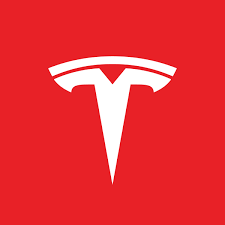

## 1.Business Problem

Date: It represents the date of the relevant trading day.

Open: It represents the starting price of the stock for the relevant trading day.

High: It represents the highest price of the relevant trading day.

Low: It represents the lowest price of the relevant trading day.

Close: It represents the closing price of the stock on the relevant trading day.

Adj Close: Represents the adjusted closing price of the stock of the relevant trading day.

Volume: It represents the transaction volume information of the relevant trading day.

## 1.İş Problemi

Date:İlgili işlem gününün tarihini temsil etmektedir.

Open:İlgili işlem gününe ait hisse başlangıç fiyatını temsil etmektedir.

High:İlgili İşlem gününe ait en yüksek fiyatı temsil etmektedir.

Low:İlgili işlem gününe ait en düşük fiyatı temsil etmektedir.

Close:İlgili işlem gününde hisse senedinin kapanış fiyatını temsil etmektedir.

Adj Close:İlgili işlem gününe ait hisse senedinin düzeltilmiş kapanış fiyatını temsil etmektedir.

Volume:İlgili işlem gününe ait işlem hacmi bilgisini temsil etmektedir.

## 1.Libraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import warnings
warnings.filterwarnings("ignore")



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

## 2.Data Load

In [76]:
df=pd.read_csv("/kaggle/input/tesla-stock-data-updated-till-28jun2021/TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [77]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400
2955,2022-03-24,1009.729980,1024.489990,988.799988,1013.919983,1013.919983,22901900


## 3.Data Preprocessing

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [79]:
# verisetimizde eksik değer yok

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2956.0,1.386913e+02,2.500448e+02,3.228,1.962700e+01,4.665700e+01,6.805700e+01,1.234410e+03
High,2956.0,1.417716e+02,2.558632e+02,3.326,2.040200e+01,4.748700e+01,6.935750e+01,1.243490e+03
Low,2956.0,1.354260e+02,2.437742e+02,2.996,1.912750e+01,4.582000e+01,6.691150e+01,1.217000e+03
Close,2956.0,1.387622e+02,2.501231e+02,3.160,1.961500e+01,4.654500e+01,6.810400e+01,1.229910e+03
Adj Close,2956.0,1.387622e+02,2.501231e+02,3.160,1.961500e+01,4.654500e+01,6.810400e+01,1.229910e+03
Volume,2956.0,3.131449e+07,2.798383e+07,592500.000,1.310288e+07,2.488680e+07,3.973875e+07,3.046940e+08


In [81]:
# Date değişkenini datatime formatına dönüştürelim

In [82]:
df["Date"]=pd.to_datetime(df["Date"])

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2956 non-null   datetime64[ns]
 1   Open       2956 non-null   float64       
 2   High       2956 non-null   float64       
 3   Low        2956 non-null   float64       
 4   Close      2956 non-null   float64       
 5   Adj Close  2956 non-null   float64       
 6   Volume     2956 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 161.8 KB


In [84]:
#amacımız kapanış fiyatını tahmin etmek ,diğer değişkenleri silelim

In [85]:
tesla_df=df[["Date","Close"]]
tesla_df

,Date,Close
0,2010-06-29,4.778000
1,2010-06-30,4.766000
2,2010-07-01,4.392000
3,2010-07-02,3.840000
4,2010-07-06,3.222000
...,...,...
2951,2022-03-18,905.390015
2952,2022-03-21,921.159973
2953,2022-03-22,993.979980
2954,2022-03-23,999.109985


In [86]:
print("Minimum tarih:",tesla_df["Date"].min())
print("Maksimum tarih:",tesla_df["Date"].max())

Minimum tarih: 2010-06-29 00:00:00
Maksimum tarih: 2022-03-24 00:00:00


In [87]:
# Veriler 6 haziran 2010 ile 24 mart 2022 tarihleri arasını kapsiyor,2956 güne ait veri var

In [88]:
# bizim işimiz Close değişkeni ile ,date yi silelim

In [89]:
tesla_df.drop("Date",axis=1,inplace=True)

In [90]:
tesla_df

,Close
0,4.778000
1,4.766000
2,4.392000
3,3.840000
4,3.222000
...,...
2951,905.390015
2952,921.159973
2953,993.979980
2954,999.109985


In [91]:
# zamana göre hisse senedi fiyatlarının kapanış değerlerini görselleştirelim

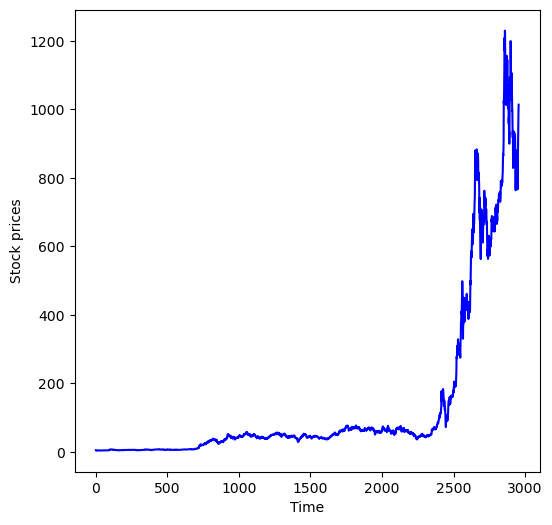

In [92]:
plt.figure(figsize=(6,6))
plt.plot(tesla_df,color="blue")
plt.ylabel("Stock prices")
plt.xlabel("Time");

In [93]:
# son zamanlarda büyük  artış görebiliyoruz

In [94]:
#  array formatına dönüştürelim

In [95]:
tesla_df=tesla_df.values

In [96]:
tesla_df[0:5]

array([[4.778],
       [4.766],
       [4.392],
       [3.84 ],
       [3.222]])

In [97]:
tesla_df[2950:]

array([[ 871.599976],
       [ 905.390015],
       [ 921.159973],
       [ 993.97998 ],
       [ 999.109985],
       [1013.919983]])

In [98]:
# fiyatta müthiş bir değişiklik görebiliyoruz,ilk zamanlarda yani 2010 larda 3-4 civarındayken 2022 lerde 1000 in üstüne çıkmış

In [99]:
# float formatına dönüştürelim

tesla_df=tesla_df.astype("float32")

In [100]:
tesla_df

array([[   4.778],
       [   4.766],
       [   4.392],
       ...,
       [ 993.98 ],
       [ 999.11 ],
       [1013.92 ]], dtype=float32)

In [101]:
tesla_df.dtype

dtype('float32')

## 4.Modelleme hazırlık aşaması


In [102]:
# Verilerimizi 20 test ,80 train şeklinde bölelim

In [103]:
## train-test split

In [104]:
int(round(len(tesla_df)*(1-0.2)))

2365

In [105]:
pos=int(round(len(tesla_df)*(0.8)))
train=tesla_df[:pos]
test=tesla_df[pos:]

In [106]:
train.shape

(2365, 1)

In [107]:
test.shape

(591, 1)

In [108]:
train[0:5]

array([[4.778],
       [4.766],
       [4.392],
       [3.84 ],
       [3.222]], dtype=float32)

In [109]:
test[0:5]

array([[71.904],
       [70.444],
       [70.966],
       [66.608],
       [67.268]], dtype=float32)

In [110]:
#  2365 tane veriyi train için 591 tanesini  test için kullanacağız

In [111]:
# Şimdi model oluşturmadan verileri ölçekleyelim

In [112]:
sc=MinMaxScaler()

In [113]:
train=sc.fit_transform(train)
test=sc.fit_transform(test)

In [114]:
train[0:5]

array([[0.02191224],
       [0.02174973],
       [0.01668473],
       [0.0092091 ],
       [0.00083965]], dtype=float32)

In [115]:
test[0:5]

array([[0.00525717],
       [0.00400301],
       [0.00445142],
       [0.00070783],
       [0.00127478]], dtype=float32)

In [116]:
# Verilerimizi 0-1 arasına sıkıştırmış olduk

In [117]:
len(train)

2365

In [118]:
X_train,y_train=[],[]

for i in range(21,2365):
    X_train.append(train[i-21:i,0])
    y_train.append(train[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)


In [119]:
X_train.shape

(2344, 21)

In [120]:
y_train.shape

(2344,)

In [121]:
# test içinde aynı işlemleri yapalım

In [122]:
len(test)

591

In [123]:
X_test,y_test=[],[]

for i in range(21,591):
    X_test.append(test[i-21:i,0])
    y_test.append(test[i,0])
    
X_test, y_test = np.array(X_test), np.array(y_test)


In [124]:
X_test.shape

(570, 21)

In [125]:
y_test.shape

(570,)

In [126]:
X_train[0:5]


array([[0.02191224, 0.02174973, 0.01668473, 0.0092091 , 0.00083965,
        0.        , 0.00449621, 0.00433369, 0.0033857 , 0.00633803,
        0.01094258, 0.01107801, 0.01310942, 0.0165493 , 0.01218852,
        0.01197184, 0.01408451, 0.01486999, 0.01394908, 0.01286566,
        0.01332611],
       [0.02174973, 0.01668473, 0.0092091 , 0.00083965, 0.        ,
        0.00449621, 0.00433369, 0.0033857 , 0.00633803, 0.01094258,
        0.01107801, 0.01310942, 0.0165493 , 0.01218852, 0.01197184,
        0.01408451, 0.01486999, 0.01394908, 0.01286566, 0.01332611,
        0.01232395],
       [0.01668473, 0.0092091 , 0.00083965, 0.        , 0.00449621,
        0.00433369, 0.0033857 , 0.00633803, 0.01094258, 0.01107801,
        0.01310942, 0.0165493 , 0.01218852, 0.01197184, 0.01408451,
        0.01486999, 0.01394908, 0.01286566, 0.01332611, 0.01232395,
        0.01121343],
       [0.0092091 , 0.00083965, 0.        , 0.00449621, 0.00433369,
        0.0033857 , 0.00633803, 0.01094258, 0.0110780

In [127]:
y_train[0:5]

array([0.01232395, 0.01121343, 0.01386782, 0.01665764, 0.01478873],
      dtype=float32)

In [128]:
y_test[0:5]

array([0.01290582, 0.01317211, 0.01551379, 0.01654976, 0.01752732],
      dtype=float32)

In [129]:
y_train.shape

(2344,)

In [130]:
# reshape

X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1, X_test.shape[1]))


y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [131]:
y_train.shape

(2344, 1)

In [132]:
y_test.shape

(570, 1)

In [133]:
X_train.shape

(2344, 1, 21)

In [134]:
X_test.shape

(570, 1, 21)

## 5.Modelleme (LTSM)

In [186]:
model4= Sequential()

model4.add(LSTM(50, return_sequences = True,activation="tanh", input_shape = (X_train.shape[1], 21)))
Dropout(0.2),
model4.add(LSTM(50,activation="tanh", return_sequences = False))
model4.add(Dense(25,activation="tanh"))
model4.add(Dense(1))


model4.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 1, 50)             14400     
                                                                 
 lstm_37 (LSTM)              (None, 50)                20200     
                                                                 
 dense_32 (Dense)            (None, 25)                1275      
                                                                 
 dense_33 (Dense)            (None, 1)                 26        
                                                                 
Total params: 35,901
Trainable params: 35,901
Non-trainable params: 0
_________________________________________________________________


In [187]:
model4.compile(optimizer="adam",loss="mean_squared_error")

In [188]:
Early_stop=EarlyStopping(monitor="val_loss",patience=8,mode="min")
callback=[Early_stop]

In [189]:
model4.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,callbacks=callback)

Epoch 1/100
74/74 [==============================] - 5s 17ms/step - loss: 0.0394 - val_loss: 0.0041
Epoch 2/100
74/74 [==============================] - 0s 7ms/step - loss: 0.0024 - val_loss: 0.0037
Epoch 3/100
74/74 [==============================] - 1s 7ms/step - loss: 0.0020 - val_loss: 0.0031
Epoch 4/100
74/74 [==============================] - 0s 7ms/step - loss: 0.0018 - val_loss: 0.0027
Epoch 5/100
74/74 [==============================] - 0s 7ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 6/100
74/74 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 7/100
74/74 [==============================] - 1s 8ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 8/100
74/74 [==============================] - 1s 7ms/step - loss: 8.8866e-04 - val_loss: 0.0014
Epoch 9/100
74/74 [==============================] - 1s 7ms/step - loss: 7.6959e-04 - val_loss: 0.0012
Epoch 10/100
74/74 [==============================] - 1s 7ms/step - loss: 7.4493e-04 - val_loss: 0.0

## 6.Değerlendirme

In [191]:
loss=model4.evaluate(X_test,y_test)

18/18 [==============================] - 0s 3ms/step - loss: 4.8974e-04


In [192]:
train_predict=model4.predict(X_train)
test_predict=model4.predict(X_test)

18/18 [==============================] - 0s 2ms/step


In [193]:
# transform to original form
train_predict = sc.inverse_transform(train_predict)
test_predict = sc.inverse_transform(test_predict)

In [194]:
# transform to original form
y_train = sc.inverse_transform(y_train)
y_test = sc.inverse_transform(y_test)

In [195]:
# train rmse
train_rmse=np.sqrt(mean_squared_error(y_train,train_predict))

In [196]:
# test rmse
test_rmse=np.sqrt(mean_squared_error(y_test,test_predict))

In [197]:
train_rmse

20.485674

In [198]:
test_rmse

25.762293

In [204]:
predicted_model1=model4.predict(X_test)
predicted_model1

18/18 [==============================] - 0s 2ms/step


array([[0.01372258],
       [0.01538442],
       [0.01594197],
       [0.01772021],
       [0.01892362],
       [0.01994471],
       [0.02050508],
       [0.01922629],
       [0.01927032],
       [0.02061522],
       [0.0220782 ],
       [0.02359204],
       [0.02572967],
       [0.02867642],
       [0.0286644 ],
       [0.0288358 ],
       [0.03358568],
       [0.03634687],
       [0.03580575],
       [0.0355215 ],
       [0.03513161],
       [0.0388331 ],
       [0.04226709],
       [0.04367943],
       [0.04370192],
       [0.04286288],
       [0.04350556],
       [0.04569867],
       [0.05241524],
       [0.05529596],
       [0.06935767],
       [0.08454058],
       [0.0743177 ],
       [0.07461619],
       [0.07457788],
       [0.07668044],
       [0.07964011],
       [0.07897504],
       [0.08228894],
       [0.08328974],
       [0.08874202],
       [0.09753182],
       [0.09879219],
       [0.09889713],
       [0.092339  ],
       [0.08811219],
       [0.08534084],
       [0.073

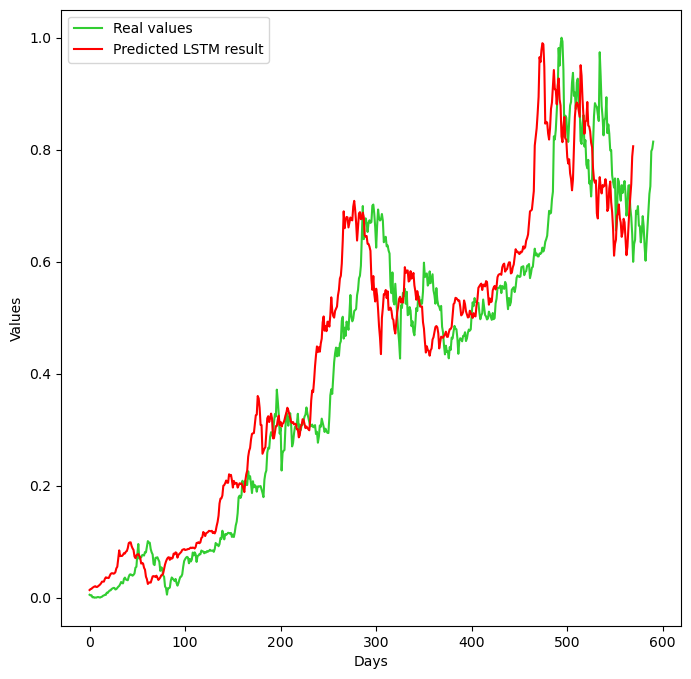

In [209]:
plt.figure(figsize=(8,8))
plt.plot(test,color="LimeGreen",label="Real values")
plt.plot(predicted_model1,color="red",label="Predicted LSTM result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.savefig(fname="grafik.png",facecolor="#f0f9e8")
plt.show()